In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Data PreProcessing

In [2]:
books= pd.read_csv('/content/Books.csv', encoding='Latin1')
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [3]:
ratings= pd.read_csv('/content/Ratings.csv', encoding='Latin1')
ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,155061224,5
2,276727,446520802,0
3,276729,052165615X,3
4,276729,521795028,6
...,...,...,...
999994,240144,373262345,8
999995,240144,373262787,0
999996,240144,037326285X,9
999997,240144,037326335X,0


In [4]:
users= pd.read_csv('/content/Users.csv', encoding='Latin1')
users

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [5]:
print(books.duplicated().sum())
print(' ')
print(ratings.duplicated().sum())
print(' ')
print(users.duplicated().sum())
print(' ')

# no duplicate values

1
 
23
 
0
 


In [6]:
print(books.isnull().sum())
print('  ')
print(ratings.isnull().sum())
print('  ')
print(users.isnull().sum())

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64
  
User-ID        0
ISBN           0
Book-Rating    0
dtype: int64
  
User-ID          0
Location         0
Age         110762
dtype: int64


<Axes: xlabel='Age', ylabel='Density'>

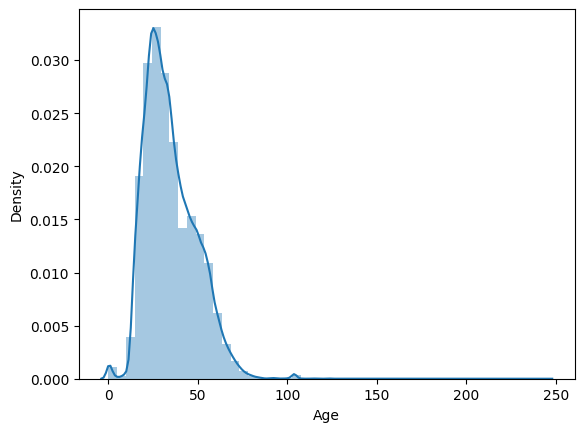

In [7]:
sns.distplot(users.Age)

In [8]:
users['Age'].fillna(users['Age'].median(), inplace=True)
users

#filled with median value because the age data it is right skeweed
'''Median value will be used whenever the data is skweede
   Mean will be used when the data is normally distributed
   Mode is used for the catagorical data'''

'Median value will be used whenever the data is skweede\n   Mean will be used when the data is normally distributed\n   Mode is used for the catagorical data'

In [9]:
users.isnull().sum()

User-ID     0
Location    0
Age         0
dtype: int64

In [10]:
books['Book-Author'].fillna('unknown', inplace=True)
books['Publisher'].fillna('unknown', inplace= True)
books['Image-URL-L'].fillna(books['Image-URL-M'], inplace=True)

In [11]:
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

In [12]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271360 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271360 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271360 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [13]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999999 entries, 0 to 999998
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   User-ID      999999 non-null  int64 
 1   ISBN         999999 non-null  object
 2   Book-Rating  999999 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 22.9+ MB


In [14]:
users.info()

# Age is in float type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       278858 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [15]:
users['Age']=users['Age'].astype('int64')

# Age datatype has been change to integer

In [16]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   User-ID   278858 non-null  int64 
 1   Location  278858 non-null  object
 2   Age       278858 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 6.4+ MB


In [17]:
for i in users:
    for i in users:
        users['Country']=users.Location.str.extract(r'\,+\s?(\w*\s?\w*)\"*$')

# Extracting only the country names to simplyfy the location data

In [18]:
users.drop('Location',axis=1,inplace=True)
users

# droping the locating column

,User-ID,Age,Country
0,1,32,usa
1,2,18,usa
2,3,32,russia
3,4,17,portugal
4,5,32,united kingdom
...,...,...,...
278853,278854,32,usa
278854,278855,50,united kingdom
278855,278856,32,canada
278856,278857,32,usa


In [19]:
file= pd.merge(books, ratings, on='ISBN')
file

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5
2,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0
3,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8
4,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,0
...,...,...,...,...,...,...,...,...,...,...
896886,312874049,In the Upper Room and Other Likely Stories,Terry Bisson,2000,Forge,http://images.amazon.com/images/P/0312874049.0...,http://images.amazon.com/images/P/0312874049.0...,http://images.amazon.com/images/P/0312874049.0...,240144,0
896887,345253140,"Martians, Go Home",Fredric Brown,1976,Ballantine Books,http://images.amazon.com/images/P/0345253140.0...,http://images.amazon.com/images/P/0345253140.0...,http://images.amazon.com/images/P/0345253140.0...,240144,0
896888,345259122,A Coffin for Dimitrios,Eric Ambler,1977,Ballantine Books,http://images.amazon.com/images/P/0345259122.0...,http://images.amazon.com/images/P/0345259122.0...,http://images.amazon.com/images/P/0345259122.0...,240144,9
896889,373262345,Dust Devils Of The Purple Sage,Tom Smith,1997,Worldwide Library,http://images.amazon.com/images/P/0373262345.0...,http://images.amazon.com/images/P/0373262345.0...,http://images.amazon.com/images/P/0373262345.0...,240144,8


In [20]:
merged_file= pd.merge(file, users, on='User-ID')
merged_file

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Age,Country
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0,18,usa
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5,32,canada
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,8,0,32,canada
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,8,0,32,canada
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,8,0,32,canada
...,...,...,...,...,...,...,...,...,...,...,...,...
896886,970086369,Spaghetti &amp; Peas,Gary Gautier,2001,All about Kids Publishing,http://images.amazon.com/images/P/0970086369.0...,http://images.amazon.com/images/P/0970086369.0...,http://images.amazon.com/images/P/0970086369.0...,239873,10,32,usa
896887,970086377,Just One More,Wendi Silvano,2002,All about Kids Publishing,http://images.amazon.com/images/P/0970086377.0...,http://images.amazon.com/images/P/0970086377.0...,http://images.amazon.com/images/P/0970086377.0...,239873,10,32,usa
896888,970086393,The Moon Smiles Down,Tony Waters,2002,All About Kids Pub,http://images.amazon.com/images/P/0970086393.0...,http://images.amazon.com/images/P/0970086393.0...,http://images.amazon.com/images/P/0970086393.0...,239873,10,32,usa
896889,971027803,"Swim, Swam, Swum",Roy Marsaw,2003,All About Kids Pub,http://images.amazon.com/images/P/0971027803.0...,http://images.amazon.com/images/P/0971027803.0...,http://images.amazon.com/images/P/0971027803.0...,239873,10,32,usa


In [21]:
columns= ['User-ID', 'Age', 'Country', 'ISBN', 'Book-Title', 'Book-Author', 'Publisher', 'Year-Of-Publication', 'Book-Rating', 'Image-URL-L']

# rearrangeing the columns according to my referances

In [22]:
df= merged_file[columns]
df.to_csv('final_file.csv', index=False)

# Creating the final Fully preprocessed, cleaned file

In [23]:
final= pd.read_csv('/content/book.csv')
final

,User-ID,Age,Country,ISBN,Book-Title,Book-Author,Publisher,Year-Of-Publication,Book-Rating,Image-URL-L
0,8,32.0,canada,1567407781,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,Brilliance Audio - Trade,1998,6,http://images.amazon.com/images/P/1567407781.0...
1,8,32.0,canada,1575663937,More Cunning Than Man: A Social History of Rat...,Robert Hendrickson,Kensington Publishing Corp.,1999,6,http://images.amazon.com/images/P/1575663937.0...
2,8,32.0,canada,1881320189,Goodbye to the Buttermilk Sky,Julia Oliver,River City Pub,1994,7,http://images.amazon.com/images/P/1881320189.0...
3,11400,49.0,canada,786868716,The Five People You Meet in Heaven,Mitch Albom,Hyperion,2003,9,http://images.amazon.com/images/P/0786868716.0...
4,11400,49.0,canada,151008116,Life of Pi,Yann Martel,Harcourt,2002,6,http://images.amazon.com/images/P/0151008116.0...
...,...,...,...,...,...,...,...,...,...,...
281256,239873,32.0,usa,970086342,Walking With Maga,Maureen Boyd Biro,Consortium Book Sales &amp; Dist,2002,10,http://images.amazon.com/images/P/0970086342.0...
281257,239873,32.0,usa,970086369,Spaghetti &amp; Peas,Gary Gautier,All about Kids Publishing,2001,10,http://images.amazon.com/images/P/0970086369.0...
281258,239873,32.0,usa,970086377,Just One More,Wendi Silvano,All about Kids Publishing,2002,10,http://images.amazon.com/images/P/0970086377.0...
281259,239873,32.0,usa,970086393,The Moon Smiles Down,Tony Waters,All About Kids Pub,2002,10,http://images.amazon.com/images/P/0970086393.0...


#To ensure statistical significance, users with less than 200 ratings, and books with less than 100 ratings are excluded.

In [24]:
counts1 = final['User-ID'].value_counts()
ratings = final[final['User-ID'].isin(counts1[counts1 >= 200].index)]
counts = final['Book-Rating'].value_counts()
ratings = final[final['Book-Rating'].isin(counts[counts >= 100].index)]

#Collaborative Filtering Using k-Nearest Neighbors (kNN)
kNN is a machine learning algorithm to find clusters of similar users based on common book ratings, and make predictions using the average rating of top-k nearest neighbors. For example, we first present ratings in a matrix with the matrix having one row for each item (book) and one column for each user,

In [25]:
combine_book_rating= final.dropna(axis = 0, subset = ['Book-Title'])

book_ratingCount= (final.groupby(by = ['Book-Title'])['Book-Rating'].count().reset_index().rename(columns = {'Book-Rating': 'totalRatingCount'})
     [['Book-Title', 'totalRatingCount']])
book_ratingCount.head()

,Book-Title,totalRatingCount
0,Dark Justice,1
1,Final Fantasy Anthology: Official Strategy Gu...,2
2,Flight of Fancy: American Heiresses (Zebra Ba...,1
3,Garfield Bigger and Better (Garfield (Numbere...,1
4,God's Little Promise Book,1


In [26]:
rating_with_totalRatingCount = final.merge(book_ratingCount, left_on = 'Book-Title', right_on = 'Book-Title', how = 'left')
rating_with_totalRatingCount.head()

,User-ID,Age,Country,ISBN,Book-Title,Book-Author,Publisher,Year-Of-Publication,Book-Rating,Image-URL-L,totalRatingCount
0,8,32.0,canada,1567407781,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,Brilliance Audio - Trade,1998,6,http://images.amazon.com/images/P/1567407781.0...,1
1,8,32.0,canada,1575663937,More Cunning Than Man: A Social History of Rat...,Robert Hendrickson,Kensington Publishing Corp.,1999,6,http://images.amazon.com/images/P/1575663937.0...,1
2,8,32.0,canada,1881320189,Goodbye to the Buttermilk Sky,Julia Oliver,River City Pub,1994,7,http://images.amazon.com/images/P/1881320189.0...,2
3,11400,49.0,canada,786868716,The Five People You Meet in Heaven,Mitch Albom,Hyperion,2003,9,http://images.amazon.com/images/P/0786868716.0...,195
4,11400,49.0,canada,151008116,Life of Pi,Yann Martel,Harcourt,2002,6,http://images.amazon.com/images/P/0151008116.0...,256


In [27]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(book_ratingCount['totalRatingCount'].describe())

count   106947.000
mean         2.630
std          7.745
min          1.000
25%          1.000
50%          1.000
75%          2.000
max        560.000
Name: totalRatingCount, dtype: float64


In [28]:
print(book_ratingCount['totalRatingCount'].quantile(np.arange(.9, 1, .01)))

0.900    4.000
0.910    5.000
0.920    5.000
0.930    6.000
0.940    7.000
0.950    8.000
0.960    9.000
0.970   12.000
0.980   16.000
0.990   26.000
Name: totalRatingCount, dtype: float64


In [29]:
popularity_threshold = 50
rating_popular_book = rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popular_book.head()

,User-ID,Age,Country,ISBN,Book-Title,Book-Author,Publisher,Year-Of-Publication,Book-Rating,Image-URL-L,totalRatingCount
3,11400,49.000,canada,786868716,The Five People You Meet in Heaven,Mitch Albom,Hyperion,2003,9,http://images.amazon.com/images/P/0786868716.0...,195
4,11400,49.000,canada,151008116,Life of Pi,Yann Martel,Harcourt,2002,6,http://images.amazon.com/images/P/0151008116.0...,256
5,11400,49.000,canada,312195516,The Red Tent (Bestselling Backlist),Anita Diamant,Picador USA,1998,7,http://images.amazon.com/images/P/0312195516.0...,297
6,11400,49.000,canada,316789089,The Pilot's Wife : A Novel Tag: Author of the ...,Anita Shreve,"Little, Brown",1999,7,http://images.amazon.com/images/P/0316789089.0...,51
7,11400,49.000,canada,743418174,Good in Bed,Jennifer Weiner,Washington Square Press,2002,8,http://images.amazon.com/images/P/0743418174.0...,214


In [30]:
rating_popular_book.shape

(40149, 11)

In [31]:
combined = rating_popular_book.merge(users, left_on = 'User-ID', right_on = 'User-ID', how = 'left')
combined

,User-ID,Age_x,Country_x,ISBN,Book-Title,Book-Author,Publisher,Year-Of-Publication,Book-Rating,Image-URL-L,totalRatingCount,Age_y,Country_y
0,11400,49.000,canada,786868716,The Five People You Meet in Heaven,Mitch Albom,Hyperion,2003,9,http://images.amazon.com/images/P/0786868716.0...,195,49,canada
1,11400,49.000,canada,151008116,Life of Pi,Yann Martel,Harcourt,2002,6,http://images.amazon.com/images/P/0151008116.0...,256,49,canada
2,11400,49.000,canada,312195516,The Red Tent (Bestselling Backlist),Anita Diamant,Picador USA,1998,7,http://images.amazon.com/images/P/0312195516.0...,297,49,canada
3,11400,49.000,canada,316789089,The Pilot's Wife : A Novel Tag: Author of the ...,Anita Shreve,"Little, Brown",1999,7,http://images.amazon.com/images/P/0316789089.0...,51,49,canada
4,11400,49.000,canada,743418174,Good in Bed,Jennifer Weiner,Washington Square Press,2002,8,http://images.amazon.com/images/P/0743418174.0...,214,49,canada
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40144,189232,32.000,usa,553455710,The Street Lawyer,John Grisham,Random House Audio Publishing Group,1999,9,http://images.amazon.com/images/P/0553455710.0...,149,32,usa
40145,189232,32.000,usa,553712527,A Painted House,John Grisham,Random House Audio Publishing Group,2001,7,http://images.amazon.com/images/P/0553712527.0...,259,32,usa
40146,115338,32.000,usa,553712527,A Painted House,John Grisham,Random House Audio Publishing Group,2001,7,http://images.amazon.com/images/P/0553712527.0...,259,32,
40147,126363,32.000,usa,1570429669,The Rescue,Nicholas Sparks,Time Warner Audio Major,2000,9,http://images.amazon.com/images/P/1570429669.0...,95,32,usa


# us & canada


In [32]:
us_canada_user_rating = combined[combined['Country_x'].notna() & combined['Country_x'].str.contains("usa|canada")]
us_canada_user_rating=us_canada_user_rating.drop('Age_x', axis=1)
us_canada_user_rating.head()

,User-ID,Country_x,ISBN,Book-Title,Book-Author,Publisher,Year-Of-Publication,Book-Rating,Image-URL-L,totalRatingCount,Age_y,Country_y
0,11400,canada,786868716,The Five People You Meet in Heaven,Mitch Albom,Hyperion,2003,9,http://images.amazon.com/images/P/0786868716.0...,195,49,canada
1,11400,canada,151008116,Life of Pi,Yann Martel,Harcourt,2002,6,http://images.amazon.com/images/P/0151008116.0...,256,49,canada
2,11400,canada,312195516,The Red Tent (Bestselling Backlist),Anita Diamant,Picador USA,1998,7,http://images.amazon.com/images/P/0312195516.0...,297,49,canada
3,11400,canada,316789089,The Pilot's Wife : A Novel Tag: Author of the ...,Anita Shreve,"Little, Brown",1999,7,http://images.amazon.com/images/P/0316789089.0...,51,49,canada
4,11400,canada,743418174,Good in Bed,Jennifer Weiner,Washington Square Press,2002,8,http://images.amazon.com/images/P/0743418174.0...,214,49,canada


#Implementing kNN
We convert our table to a 2D matrix, and fill the missing values with zeros (since we will calculate distances between rating vectors). We then transform the values(ratings) of the matrix dataframe into a scipy sparse matrix for more efficient calculations.

Finding the Nearest Neighbors We use unsupervised algorithms with sklearn.neighbors. The algorithm we use to compute the nearest neighbors is “brute”, and we specify “metric=cosine” so that the algorithm will calculate the cosine similarity between rating vectors. Finally, we fit the model

In [33]:
from scipy.sparse import csr_matrix

us_canada_user_rating = us_canada_user_rating.drop_duplicates(['User-ID', 'Book-Title'])
us_canada_user_rating_pivot = us_canada_user_rating.pivot(index = 'Book-Title', columns = 'User-ID', values = 'Book-Rating').fillna(0)
us_canada_user_rating_matrix = csr_matrix(us_canada_user_rating_pivot.values)

In [34]:
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(us_canada_user_rating_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [35]:
query_index = 0

us_canada_user_rating_pivot.iloc[query_index,:].values.reshape(1,-1)

array([[0., 0., 0., ..., 0., 0., 0.]])

In [36]:
query_index = int(input("Enter the index you want to query: "))
print(query_index)
distances, indices = model_knn.kneighbors(us_canada_user_rating_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)


Enter the index you want to query: 0
0


In [37]:
us_canada_user_rating_pivot.index[query_index]

'1984'

In [38]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(us_canada_user_rating_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, us_canada_user_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for 1984:

1: Animal Farm, with distance of 0.8309168642078534:
2: Brave New World, with distance of 0.8424398320859859:
3: Slaughterhouse Five or the Children's Crusade: A Duty Dance With Death, with distance of 0.8852768756641552:
4: The Hitchhiker's Guide to the Galaxy, with distance of 0.8987745640063276:
5: The Handmaid's Tale, with distance of 0.8995404861998978:


In [39]:
rating_popular_book['Book-Rating'] = pd.to_numeric(rating_popular_book['Book-Rating'], errors='coerce')

rating_popular_book_agg = rating_popular_book.groupby(['User-ID', 'Book-Title'])['Book-Rating'].mean().reset_index()

# pivot 2


In [40]:
us_canada_user_rating_pivot2 = rating_popular_book_agg.pivot(index='User-ID', columns='Book-Title', values='Book-Rating').fillna(0)
us_canada_user_rating_pivot2

Book-Title,1984,1st to Die: A Novel,2nd Chance,84 Charing Cross Road,A Bend in the Road,A Case of Need,"A Child Called \It\"": One Child's Courage to Survive""",A Fine Balance,A Heartbreaking Work of Staggering Genius,A Is for Alibi (Kinsey Millhone Mysteries (Paperback)),...,Who Moved My Cheese? An Amazing Way to Deal with Change in Your Work and in Your Life,Wicked: The Life and Times of the Wicked Witch of the West,Wild Animus,Winter Solstice,Wish You Well,Without Remorse,Wuthering Heights,Year of Wonders,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,"\O\"" Is for Outlaw"""
User-ID,,,,,,,,,,,,,,,,,,,,,
9,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
16,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
26,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
32,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
42,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278836,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
278843,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
278844,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [41]:
us_canada_user_rating_pivot2.shape

(17094, 425)

In [42]:
X = us_canada_user_rating_pivot2.values.T
X.shape

(425, 17094)

# svd

In [43]:
import sklearn
from sklearn.decomposition import TruncatedSVD

In [44]:
SVD = TruncatedSVD(n_components=12, random_state=17)
matrix = SVD.fit_transform(X)
matrix.shape

(425, 12)

In [45]:
corr = np.corrcoef(matrix)
corr.shape

(425, 425)

In [46]:
us_canada_book_title = us_canada_user_rating_pivot2.columns
us_canada_book_list = list(us_canada_book_title)
coffey_hands = us_canada_book_list.index("Harry Potter and the Sorcerer's Stone (Book 1)")
coffey_hands

143

In [47]:
corr_coffey_hands  = corr[coffey_hands]

In [48]:
list(us_canada_book_title[(corr_coffey_hands<1.0) & (corr_coffey_hands>0.9)])


['Harry Potter and the Goblet of Fire (Book 4)',
 'Harry Potter and the Order of the Phoenix (Book 5)',
 'Harry Potter and the Prisoner of Azkaban (Book 3)']

In [49]:
recommended_books = list(us_canada_book_title[(corr_coffey_hands < 1.0) & (corr_coffey_hands > 0.9)])
recommended_books

['Harry Potter and the Goblet of Fire (Book 4)',
 'Harry Potter and the Order of the Phoenix (Book 5)',
 'Harry Potter and the Prisoner of Azkaban (Book 3)']

In [50]:
recommended_books_urls = final[final['Book-Title'].isin(recommended_books)]
recomm= recommended_books_urls.drop_duplicates(subset='Book-Title')
recomm

,User-ID,Age,Country,ISBN,Book-Title,Book-Author,Publisher,Year-Of-Publication,Book-Rating,Image-URL-L
779,11676,32.000,usa,439139597,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,Scholastic,2000,8,http://images.amazon.com/images/P/0439139597.0...
891,11676,32.000,usa,439136369,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,Scholastic,2001,9,http://images.amazon.com/images/P/0439136369.0...
13798,55492,43.000,usa,043935806X,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,Scholastic,2003,9,http://images.amazon.com/images/P/043935806X.0...


In [51]:
from IPython.display import display, HTML

for _, row in recomm.iterrows():
    print(f"Book Title: {row['Book-Title']}")
    display(HTML(f"<img src='{row['Image-URL-L']}' alt='{row['Book-Title']}' style='width:150px;'>"))


Book Title: Harry Potter and the Goblet of Fire (Book 4)


Book Title: Harry Potter and the Prisoner of Azkaban (Book 3)


Book Title: Harry Potter and the Order of the Phoenix (Book 5)


- this code is analyzing the interaction data stored in the DataFrame final to determine the number of users and identify users who have a sufficient number of interactions (at least 100 interactions).
- The criteria for "enough interactions" can be adjusted by changing the value 100 in the code.

In [52]:
users_interactions_count_df = final.groupby(['ISBN', 'User-ID']).size().groupby('User-ID').size()
print('# of users: %d' % len(users_interactions_count_df))

users_with_enough_interactions_df = users_interactions_count_df[users_interactions_count_df >= 100].reset_index()[['User-ID']]
print('# of users with at least 5 interactions: %d' % len(users_with_enough_interactions_df))

# of users: 53222
# of users with at least 5 interactions: 304


In [53]:
# our file merge with users_with_enough_interactions_df
print('# of interactions: %d' % len(final))
interactions_from_selected_users_df = final.merge(users_with_enough_interactions_df,
               how = 'right',
               left_on = 'User-ID',
               right_on = 'User-ID')
print('# of interactions from users with at least 5 interactions: %d' % len(interactions_from_selected_users_df))

# of interactions: 281261
# of interactions from users with at least 5 interactions: 71058


In [54]:
interactions_from_selected_users_df.head(10)

,User-ID,Age,Country,ISBN,Book-Title,Book-Author,Publisher,Year-Of-Publication,Book-Rating,Image-URL-L
0,2033,27.000,usa,142000663,The Grapes of Wrath: John Steinbeck Centennial...,John Steinbeck,Penguin Books,2002,10,http://images.amazon.com/images/P/0142000663.0...
1,2033,27.000,usa,836218256,Something Under the Bed Is Drooling,Bill Watterson,Andrews McMeel Publishing,1988,9,http://images.amazon.com/images/P/0836218256.0...
2,2033,27.000,usa,30020786,Principles of Instrumental Analysis,Douglas A. Skoog,Brooks Cole,1997,7,http://images.amazon.com/images/P/0030020786.0...
3,2033,27.000,usa,133502813,Chemistry,John McMurry,Prentice Hall,1994,10,http://images.amazon.com/images/P/0133502813.0...
4,2033,27.000,usa,716724022,Physical Chemistry,P. W. Atkins,W.H. Freeman &amp; Company,1994,7,http://images.amazon.com/images/P/0716724022.0...
5,2033,27.000,usa,60256664,The Giving Tree,Shel Silverstein,HarperCollins,1964,10,http://images.amazon.com/images/P/0060256664.0...
6,2033,27.000,usa,786861320,The Wall Street Journal Lifetime Guide to Mone...,Staff of the Wall St Journal,Hyperion,1997,8,http://images.amazon.com/images/P/0786861320.0...
7,2033,27.000,usa,688149790,Babyhood,Paul Reiser,William Morrow &amp; Company,1997,8,http://images.amazon.com/images/P/0688149790.0...
8,2033,27.000,usa,671519751,Thirty Five Thousand Plus Baby Names: The Larg...,Bruce Lansky,Meadowbrook,1995,10,http://images.amazon.com/images/P/0671519751.0...
9,2033,27.000,usa,812090381,"Maine Coon Cats: Everything About Purchase, Ca...",Carol Himsel Daly,Barron's Educational Series,1995,9,http://images.amazon.com/images/P/0812090381.0...


In [55]:
import math

- this code takes user-item interaction data, aggregates the ratings by summing them up, applies a logarithmic transformation to smooth user preferences, and then prints the number of unique user-item interactions along with a preview of the processed data.
- The purpose of smoothing is to handle extreme values (e.g., high ratings) and create a more meaningful representation of user preferences.


In [56]:
def smooth_user_preference(x):
    return math.log(1+x, 2)

interactions_full_df = interactions_from_selected_users_df.groupby(['ISBN', 'User-ID'])['Book-Rating'].sum().apply(smooth_user_preference).reset_index()
print('# of unique user/item interactions: %d' % len(interactions_full_df))
interactions_full_df.head()

# of unique user/item interactions: 71055


,ISBN,User-ID,Book-Rating
0,000104687X,23902,2.807
1,000223257X,30511,3.000
2,000225056X,101851,3.459
3,000225929X,11676,3.459
4,000470973X,37644,2.807


In [57]:
# tarin_test_split

from sklearn.model_selection import train_test_split

# interaction of train set and interaction of test set

In [58]:
interactions_train_df, interactions_test_df = train_test_split(interactions_full_df,
                                   stratify=interactions_full_df['User-ID'],
                                   test_size=0.20,
                                   random_state=42)

print('# interactions on Train set: %d' % len(interactions_train_df))
print('# interactions on Test set: %d' % len(interactions_test_df))

# interactions on Train set: 56844
# interactions on Test set: 14211


In [59]:
interactions_test_df.head()

,ISBN,User-ID,Book-Rating
5915,140139400,156269,3.000
1877,038550926X,182993,3.322
27636,380977087,98391,3.322
49935,61030244,122793,2.807
24094,373712200,98391,3.459


#Creating a sparse pivot table with users in rows and items in columns

- this code transforms the user-item interaction data from a long format (rows for each interaction) into a pivot matrix format, where users are on the rows, items are on the columns, and the matrix values represent the interactions

In [60]:
users_items_pivot_matrix_df = interactions_train_df.pivot(index='User-ID',
                                                          columns='ISBN',
                                                          values='Book-Rating').fillna(0)

users_items_pivot_matrix_df.head()

ISBN,000223257X,000225056X,000225929X,000611962X,000647425X,000648302X,000649840X,000651202X,000651202x,000673765X,...,B00005TZWI,B00007FYKW,B000092Q0A,B00009EF82,B00009NDAN,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B0001I1KOG,B000234N3A
User-ID,,,,,,,,,,,,,,,,,,,,,
2033,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2276,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4017,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4385,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
5582,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [61]:
#this code takes the user-item pivot matrix stored in the Pandas DataFrame and converts it into a NumPy array .

users_items_pivot_matrix = users_items_pivot_matrix_df.values
users_items_pivot_matrix[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [62]:
users_ids = list(users_items_pivot_matrix_df.index)
users_ids[:10]

[2033, 2276, 4017, 4385, 5582, 6251, 6543, 6575, 7346, 8067]

# matrix factorization

In [63]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds

- In matrix factorization, especially in the context of collaborative filtering or recommendation systems, the terms U(User matrix), Σ(sigma), and Vt (Item matrix (transposed)) are associated with the Singular Value Decomposition (SVD) of a matrix.
- The product of U, Σ, and VT approximates the original matrix R, allowing for the prediction of missing values or recommendations for unseen user-item pairs.



In [64]:
# The number of factors to factor the user-item matrix.
NUMBER_OF_FACTORS_MF = 15

#Performs matrix factorization of the original user item matrix
U, sigma, Vt = svds(users_items_pivot_matrix, k = NUMBER_OF_FACTORS_MF)

In [65]:
users_items_pivot_matrix.shape

(304, 41431)

In [66]:
U.shape

(304, 15)

In [67]:
sigma = np.diag(sigma)
sigma.shape

(15, 15)

In [68]:
Vt.shape

(15, 41431)

- After the factorization, we try to to reconstruct the original matrix by multiplying its factors.
-The resulting matrix is not sparse any more. It was generated predictions for items the user have not yet interaction, which we will exploit for recommendations.

In [69]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt)
all_user_predicted_ratings

array([[ 0.00061749,  0.02817279, -0.00105967, ...,  0.00142751,
         0.00029271,  0.00925998],
       [ 0.00054943,  0.0017968 ,  0.00265486, ...,  0.00071323,
         0.00020687,  0.006105  ],
       [ 0.00272478, -0.00621443,  0.00232235, ...,  0.00195502,
         0.00062234,  0.02096657],
       ...,
       [ 0.00155637, -0.00312313,  0.01062478, ...,  0.0008469 ,
         0.00028583,  0.01011761],
       [ 0.00214322,  0.00793762,  0.00418715, ...,  0.00111942,
         0.0002139 ,  0.0133209 ],
       [ 0.00126423,  0.02914188,  0.0044679 , ...,  0.00174836,
         0.00039213,  0.01436766]])

In [70]:
all_user_predicted_ratings.shape

(304, 41431)

In [71]:
#Converting the reconstructed matrix back to a Pandas dataframe caalled Collaborative filltering dataframe
cf_preds_df = pd.DataFrame(all_user_predicted_ratings, columns = users_items_pivot_matrix_df.columns, index=users_ids).transpose()
cf_preds_df.head()

,2033,2276,4017,4385,5582,6251,6543,6575,7346,8067,...,235105,235282,236058,236283,236340,236757,236948,239584,239594,277427
ISBN,,,,,,,,,,,,,,,,,,,,,
000223257X,0.001,0.001,0.003,0.000,0.001,0.002,0.002,0.005,0.005,0.001,...,-0.002,0.002,0.001,0.001,0.002,0.001,0.000,0.002,0.002,0.001
000225056X,0.028,0.002,-0.006,-0.001,0.002,0.035,0.009,0.040,0.029,-0.000,...,-0.006,-0.007,-0.002,-0.003,0.006,-0.000,0.010,-0.003,0.008,0.029
000225929X,-0.001,0.003,0.002,0.004,0.002,0.008,0.011,0.011,0.010,0.004,...,-0.002,0.009,0.001,0.010,0.011,0.001,0.000,0.011,0.004,0.004
000611962X,-0.001,-0.001,0.014,-0.000,0.011,0.004,-0.004,0.010,0.010,-0.002,...,-0.001,-0.004,0.006,-0.004,0.005,0.002,0.004,-0.002,0.045,-0.002
000647425X,0.002,0.002,0.006,0.001,0.003,0.005,0.004,0.008,0.011,0.003,...,0.005,0.006,0.002,0.008,0.005,0.003,0.000,0.003,0.002,0.003


In [72]:
# check len of prediction

len(cf_preds_df.columns)

304

- we trying to access a DataFrame named books globally and then display its first few rows using the head() method

In [73]:
global final
final.head()

,User-ID,Age,Country,ISBN,Book-Title,Book-Author,Publisher,Year-Of-Publication,Book-Rating,Image-URL-L
0,8,32.000,canada,1567407781,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,Brilliance Audio - Trade,1998,6,http://images.amazon.com/images/P/1567407781.0...
1,8,32.000,canada,1575663937,More Cunning Than Man: A Social History of Rat...,Robert Hendrickson,Kensington Publishing Corp.,1999,6,http://images.amazon.com/images/P/1575663937.0...
2,8,32.000,canada,1881320189,Goodbye to the Buttermilk Sky,Julia Oliver,River City Pub,1994,7,http://images.amazon.com/images/P/1881320189.0...
3,11400,49.000,canada,786868716,The Five People You Meet in Heaven,Mitch Albom,Hyperion,2003,9,http://images.amazon.com/images/P/0786868716.0...
4,11400,49.000,canada,151008116,Life of Pi,Yann Martel,Harcourt,2002,6,http://images.amazon.com/images/P/0151008116.0...


- Within the CFRecommender class, we have implemented a collaborative filtering recommender system. Using predictions from collaborative filtering, the recommender creates customized item recommendations for each user. The predicted strength (recStrength), the book title, and the ISBN are included in the recommendations.

In [74]:
class CFRecommender:

    MODEL_NAME = 'Collaborative Filtering'

    def __init__(self, cf_predictions_df): #assumed to be a DataFrame containing collaborative filtering predictions.
        self.cf_predictions_df = cf_predictions_df # Initializes the instance variable

    def get_model_name(self):
        return self.MODEL_NAME

    def recommend_items(self, user_id, items_to_ignore=[], topn=10):
        # Get and sort the user's predictions
        sorted_user_predictions = self.cf_predictions_df[user_id].sort_values(ascending=False).reset_index().rename(columns={user_id: 'recStrength'})

        # Recommend the highest predicted rating content that the user hasn't seen yet.
        recommendations_df = sorted_user_predictions[~sorted_user_predictions['ISBN'].isin(items_to_ignore)].sort_values('recStrength', ascending = False).head(topn)
        recommendations_df=recommendations_df.merge(books,on='ISBN',how='inner')
        recommendations_df=recommendations_df[['ISBN','Book-Title','recStrength']]

        return recommendations_df



cf_recommender_model = CFRecommender(cf_preds_df)

In [75]:
#Indexing by person Id to speed up the searches during evaluation
interactions_full_indexed_df = interactions_full_df.set_index('User-ID')
interactions_train_indexed_df = interactions_train_df.set_index('User-ID')
interactions_test_indexed_df = interactions_test_df.set_index('User-ID')

In [76]:
def get_items_interacted(UserID, interactions_df):
    interacted_items = interactions_df.loc[UserID]['ISBN']
    return set(interacted_items if type(interacted_items) == pd.Series else [interacted_items])

- evaluate_model_for_user method assesses the model's recommendations for a specific user, while the recommend_book method calls the former for a given user ID. The code also includes utility functions like get_not_interacted_items_sample for handling non-interacted items.

In [77]:
import random

class ModelRecommender:

    # Function for getting the set of items which a user has not interacted
    def get_not_interacted_items_sample(self, UserID, sample_size, seed=42):
        interacted_items = get_items_interacted(UserID, interactions_full_indexed_df)
        all_items = set(final['ISBN'])
        non_interacted_items = all_items - interacted_items

        random.seed(seed)
        non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
        return set(non_interacted_items_sample)



    # Function to verify whether a particular item_id was present in the set of top N recommended items
    def _verify_hit_top_n(self, item_id, recommended_items, topn):
            try:
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                index = -1
            hit = int(index in range(0, topn))
            return hit, index

    # Function to evaluate the performance of model for each user
    def evaluate_model_for_user(self, model, person_id):

        # Getting the items in test set
        interacted_values_testset = interactions_test_indexed_df.loc[person_id]

        if type(interacted_values_testset['ISBN']) == pd.Series:
            person_interacted_items_testset = set(interacted_values_testset['ISBN'])
        else:
            person_interacted_items_testset = set([int(interacted_values_testset['ISBN'])])

        interacted_items_count_testset = len(person_interacted_items_testset)

        # Getting a ranked recommendation list from the model for a given user
        person_recs_df = model.recommend_items(person_id, items_to_ignore=get_items_interacted(person_id, interactions_train_indexed_df),topn=10000000000)
        print('Recommendation for User-ID = ',person_id)
        print(person_recs_df.head(10))

    # Function to evaluate the performance of model at overall level
    def recommend_book(self, model ,userid):

        person_metrics = self.evaluate_model_for_user(model, userid)
        return

model_recommender = ModelRecommender()

In [78]:
print(interactions_full_indexed_df.index.values)

[ 23902  30511 101851 ... 164533 148258 100906]


In [79]:
user=int(input("Enter User ID from above list for book recommendation  "))
model_recommender.recommend_book(cf_recommender_model,user)

Enter User ID from above list for book recommendation  23902
Recommendation for User-ID =  23902
         ISBN                                         Book-Title  recStrength
0  1573229725                                        Fingersmith        0.139
1    60958022                        Five Quarters of the Orange        0.136
2   552998486                                           Chocolat        0.126
3   439136350  Harry Potter and the Prisoner of Azkaban (Book 3)        0.122
4   156027321                                         Life of Pi        0.122
5   618002235     The Two Towers (The Lord of the Rings, Part 2)        0.112
6  044022392X        The Keys to the Street: A Novel of Suspense        0.106
7   553277472  Zen and the Art of Motorcycle Maintenance: An ...        0.098
8   743219554                      An Unsuitable Job for a Woman        0.095
9   316666343                          The Lovely Bones: A Novel        0.094


# Evaluate
In Recommender Systems, there are a set metrics commonly used for evaluation. We choose to work with accuracy metrics, which evaluates the accuracy of the top recommendations provided to a user, comparing to the items the user has actually interacted in test set.

# This evaluation method works as follows

- For each user
- For each item the user has interacted in test set
- Sample 100 other items the user has never interacted.   
- Ask the recommender model to produce a ranked list of recommended items, from a set composed of one interacted item and the 100 non-interacted items
- Compute the Top-N accuracy metrics for this user and interacted item from the recommendations ranked list
- Aggregate the global Top-N accuracy metrics

In [80]:
#Top-N accuracy metrics consts
EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS = 100

class ModelEvaluator:

    # Function for getting the set of items which a user has not interacted with
    def get_not_interacted_items_sample(self, UserID, sample_size, seed=42):
        interacted_items = get_items_interacted(UserID, interactions_full_indexed_df)
        all_items = set(final['ISBN'])
        non_interacted_items = all_items - interacted_items

        random.seed(seed)
        non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
        return set(non_interacted_items_sample)

    # Function to verify whether a particular item_id was present in the set of top N recommended items
    def _verify_hit_top_n(self, item_id, recommended_items, topn):
            try:
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                index = -1
            hit = int(index in range(0, topn))
            return hit, index

    # Function to evaluate the performance of model for each user
    def evaluate_model_for_user(self, model, person_id):

        # Getting the items in test set
        interacted_values_testset = interactions_test_indexed_df.loc[person_id]

        if type(interacted_values_testset['ISBN']) == pd.Series:
            person_interacted_items_testset = set(interacted_values_testset['ISBN'])
        else:
            person_interacted_items_testset = set([int(interacted_values_testset['ISBN'])])

        interacted_items_count_testset = len(person_interacted_items_testset)

        # Getting a ranked recommendation list from the model for a given user
        person_recs_df = model.recommend_items(person_id, items_to_ignore=get_items_interacted(person_id, interactions_train_indexed_df),topn=10000000000)

        hits_at_5_count = 0
        hits_at_10_count = 0

        # For each item the user has interacted in test set
        for item_id in person_interacted_items_testset:

            # Getting a random sample of 100 items the user has not interacted with
            non_interacted_items_sample = self.get_not_interacted_items_sample(person_id, sample_size=EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS, seed=item_id)    #%(2**32))

            # Combining the current interacted item with the 100 random items
            items_to_filter_recs = non_interacted_items_sample.union(set([item_id]))

            # Filtering only recommendations that are either the interacted item or from a random sample of 100 non-interacted items
            valid_recs_df = person_recs_df[person_recs_df['ISBN'].isin(items_to_filter_recs)]
            valid_recs = valid_recs_df['ISBN'].values

            # Verifying if the current interacted item is among the Top-N recommended items top 5 and top 10 items
            hit_at_5, index_at_5 = self._verify_hit_top_n(item_id, valid_recs, 5)
            hits_at_5_count += hit_at_5
            hit_at_10, index_at_10 = self._verify_hit_top_n(item_id, valid_recs, 10)
            hits_at_10_count += hit_at_10
        #The evaluate_model_for_user method evaluates the performance of a recommendation model for a specific user in terms of hits at top-5 and top-10 recommendations.
        # It iterates over the items the user has interacted with in the test set, gets recommendations from the model, and checks whether the interacted items are among the top recommendations

        # Recall is the rate of the interacted items that are ranked among the Top-N recommended items
        recall_at_5 = hits_at_5_count / float(interacted_items_count_testset)
        recall_at_10 = hits_at_10_count / float(interacted_items_count_testset)

        person_metrics = {'hits@5_count':hits_at_5_count,
                          'hits@10_count':hits_at_10_count,
                          'interacted_count': interacted_items_count_testset,
                          'recall@5': recall_at_5,
                          'recall@10': recall_at_10}
        return person_metrics
        #calculates recall metrics for a user based on the number of hits in the top N recommended items.
        # It is part of the evaluation process for a recommendation model, assessing how well the model can recommend items that the user has previously interacted with.
        #The actual values of hits_at_5_count and hits_at_10_count depend on how many of the interacted items are successfully recommended within the top 5 and top 10 recommendations, respectively

    # Function to evaluate the performance of model at overall level
    def evaluate_model(self, model):

        people_metrics = []

        for idx, person_id in enumerate(list(interactions_test_indexed_df.index.unique().values)):
            person_metrics = self.evaluate_model_for_user(model, person_id)
            person_metrics['User-ID'] = person_id
            people_metrics.append(person_metrics)

        print('%d users processed' % idx)

        detailed_results_df = pd.DataFrame(people_metrics).sort_values('interacted_count', ascending=False)

        global_recall_at_5 = detailed_results_df['hits@5_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        global_recall_at_10 = detailed_results_df['hits@10_count'].sum() / float(detailed_results_df['interacted_count'].sum())

        global_metrics = {'modelName': model.get_model_name(),
                          'recall@5': global_recall_at_5,
                          'recall@10': global_recall_at_10}
        return global_metrics, detailed_results_df

model_evaluator = ModelEvaluator()

In [81]:
print('Evaluating Collaborative Filtering (SVD Matrix Factorization) model...')
cf_global_metrics, cf_detailed_results_df = model_evaluator.evaluate_model(cf_recommender_model)

print('\nGlobal metrics:\n%s' % cf_global_metrics)
cf_detailed_results_df.head(10)

Evaluating Collaborative Filtering (SVD Matrix Factorization) model...
303 users processed

Global metrics:
{'modelName': 'Collaborative Filtering', 'recall@5': 0.19900077404827246, 'recall@10': 0.26542818943072266}


,hits@5_count,hits@10_count,interacted_count,recall@5,recall@10,User-ID
15,162,219,1138,0.142,0.192,11676
2,127,152,1106,0.115,0.137,98391
99,59,76,342,0.173,0.222,153662
72,22,26,217,0.101,0.120,23902
78,38,50,196,0.194,0.255,235105
85,30,36,177,0.169,0.203,171118
75,11,17,171,0.064,0.099,76499
35,13,17,166,0.078,0.102,56399
83,14,17,153,0.092,0.111,197659
115,38,46,144,0.264,0.319,16795
